<h2 style="text-align: center;"><strong>Differential Privacy Strategies for Data Analytics in the Banking Sector</strong></h2>

<div style="text-align: center;">
  Universidad de los Andes<br>
  Author: Daniela Espinosa 202022615<br>
</div>


### **Data preprocessing**

### Data Loading

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

raw_data = pd.read_csv('C:/Users/danie/OneDrive/Documentos/1 UNIANDES/10 semestre/Tesis/differential-privacy-banking-sector/data/raw/bank-full.csv', sep=';')
raw_data.shape

(45211, 17)

### Data profiling


Información del dataset:

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
raw_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
raw_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
duplicates = raw_data.duplicated().sum()
print(f"\nNumber of duplicates: {duplicates}")


Number of duplicates: 0


Column unique values:

In [7]:
levels = raw_data.apply(pd.Series.unique)
num_levels = raw_data.apply(pd.Series.nunique)
print("Valores unicos por columna:")
print(levels)
print("/nNúmero unicos por columna:")
print(num_levels)

Valores unicos por columna:
age          [58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5...
job          [management, technician, entrepreneur, blue-co...
marital                            [married, single, divorced]
education              [tertiary, secondary, unknown, primary]
default                                              [no, yes]
balance      [2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270...
housing                                              [yes, no]
loan                                                 [no, yes]
contact                         [unknown, cellular, telephone]
day          [5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21...
month        [may, jun, jul, aug, oct, nov, dec, jan, feb, ...
duration     [261, 151, 76, 92, 198, 139, 217, 380, 50, 55,...
campaign     [1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13, 19...
pdays        [-1, 151, 166, 91, 86, 143, 147, 89, 140, 176,...
previous     [0, 3, 1, 4, 2, 11, 16, 6, 5, 10, 12, 7, 18, 9...
poutcome                   

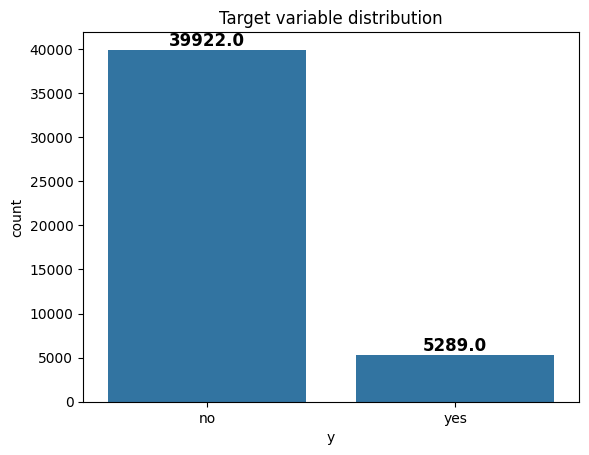

In [8]:
# Suponiendo que raw_data es tu DataFrame y 'y' es la variable categórica
ax = sns.countplot(x='y', data=raw_data)
plt.title("Target variable distribution")

# Agregar los valores numéricos sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.show()

### Data cleaning

In [9]:
clean_data = raw_data.copy()

In [10]:
clean_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
# Conversión de columnas binarias
clean_data['default'] = clean_data['default'].map({'no': 0, 'yes': 1})
clean_data['housing'] = clean_data['housing'].map({'no': 0, 'yes': 1})
clean_data['loan'] = clean_data['loan'].map({'no': 0, 'yes': 1})
clean_data['y'] = clean_data['y'].map({'no': 0, 'yes': 1})

In [12]:
clean_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [13]:
# Conversión de meses
clean_data['month'] = clean_data['month'].replace({
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}).infer_objects()

C:\Users\danie\AppData\Local\Temp\ipykernel_9740\3419548540.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_data['month'] = clean_data['month'].replace({


In [14]:
# Conversión de columnas categóricas
data_obj = clean_data.select_dtypes(include=['object']).astype('category')
clean_data = pd.get_dummies(data=clean_data, columns=data_obj.columns, drop_first=True,dtype=int)

In [15]:
print('New Number of Features: %d'%(clean_data.shape[1]))
clean_data.head()

New Number of Features: 33


,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,1,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,0,1,1,0,0,0,1,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,1,0,0,0,1,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,1,0,0,0,1,0,1,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,1,0,0,1,0,1,0,0,1


In [16]:
processed_path = 'C:/Users/danie/OneDrive/Documentos/1 UNIANDES/10 semestre/Tesis/differential-privacy-banking-sector/data/processed/bank-processed.csv'
clean_data.to_csv(processed_path, index=False)
print(f"Dataset preprocesado guardado en: {processed_path}")

Dataset preprocesado guardado en: C:/Users/danie/OneDrive/Documentos/1 UNIANDES/10 semestre/Tesis/differential-privacy-banking-sector/data/processed/bank-processed.csv
